<a href="https://colab.research.google.com/github/girisiman/Deep_Learning_Tasks/blob/master/ML_PROJECT_FINAL_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving breast_cancer.csv to breast_cancer (2).csv
User uploaded file "breast_cancer.csv" with length 44930 bytes


In [0]:
#Result {'RandomForest_Original Data':[], 'RandomForest_ScaledData':[], 'SVM_original_data':[],'SVM_scaledData':[]}
Result1 = {'Random_Forest_original': [], 'SVM_original':[], }
Result3 = {'Random_Forest': [], 'SVM':[], }

In [0]:
import pandas as pd
data_v3 = pd.read_csv('breast_cancer.csv')
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
ID                         198 non-null int64
Time                       198 non-null int64
Radius_mean                198 non-null float64
Texture_mean               198 non-null float64
Perimeter_mean             198 non-null float64
Area_mean                  198 non-null float64
Smoothness_mean            198 non-null float64
Compactness_mean           198 non-null float64
Concavity_mean             198 non-null float64
Concave points_mean        198 non-null float64
Symmetry_mean              198 non-null float64
Fractal Dimension_mean     198 non-null float64
Radius_SE                  198 non-null float64
Texture_SE                 198 non-null float64
Perimeter_SE               198 non-null float64
Area_SE                    198 non-null float64
Smoothness_SE              198 non-null float64
Compactness_SE             198 non-null float64
Concavity_SE               198 non-

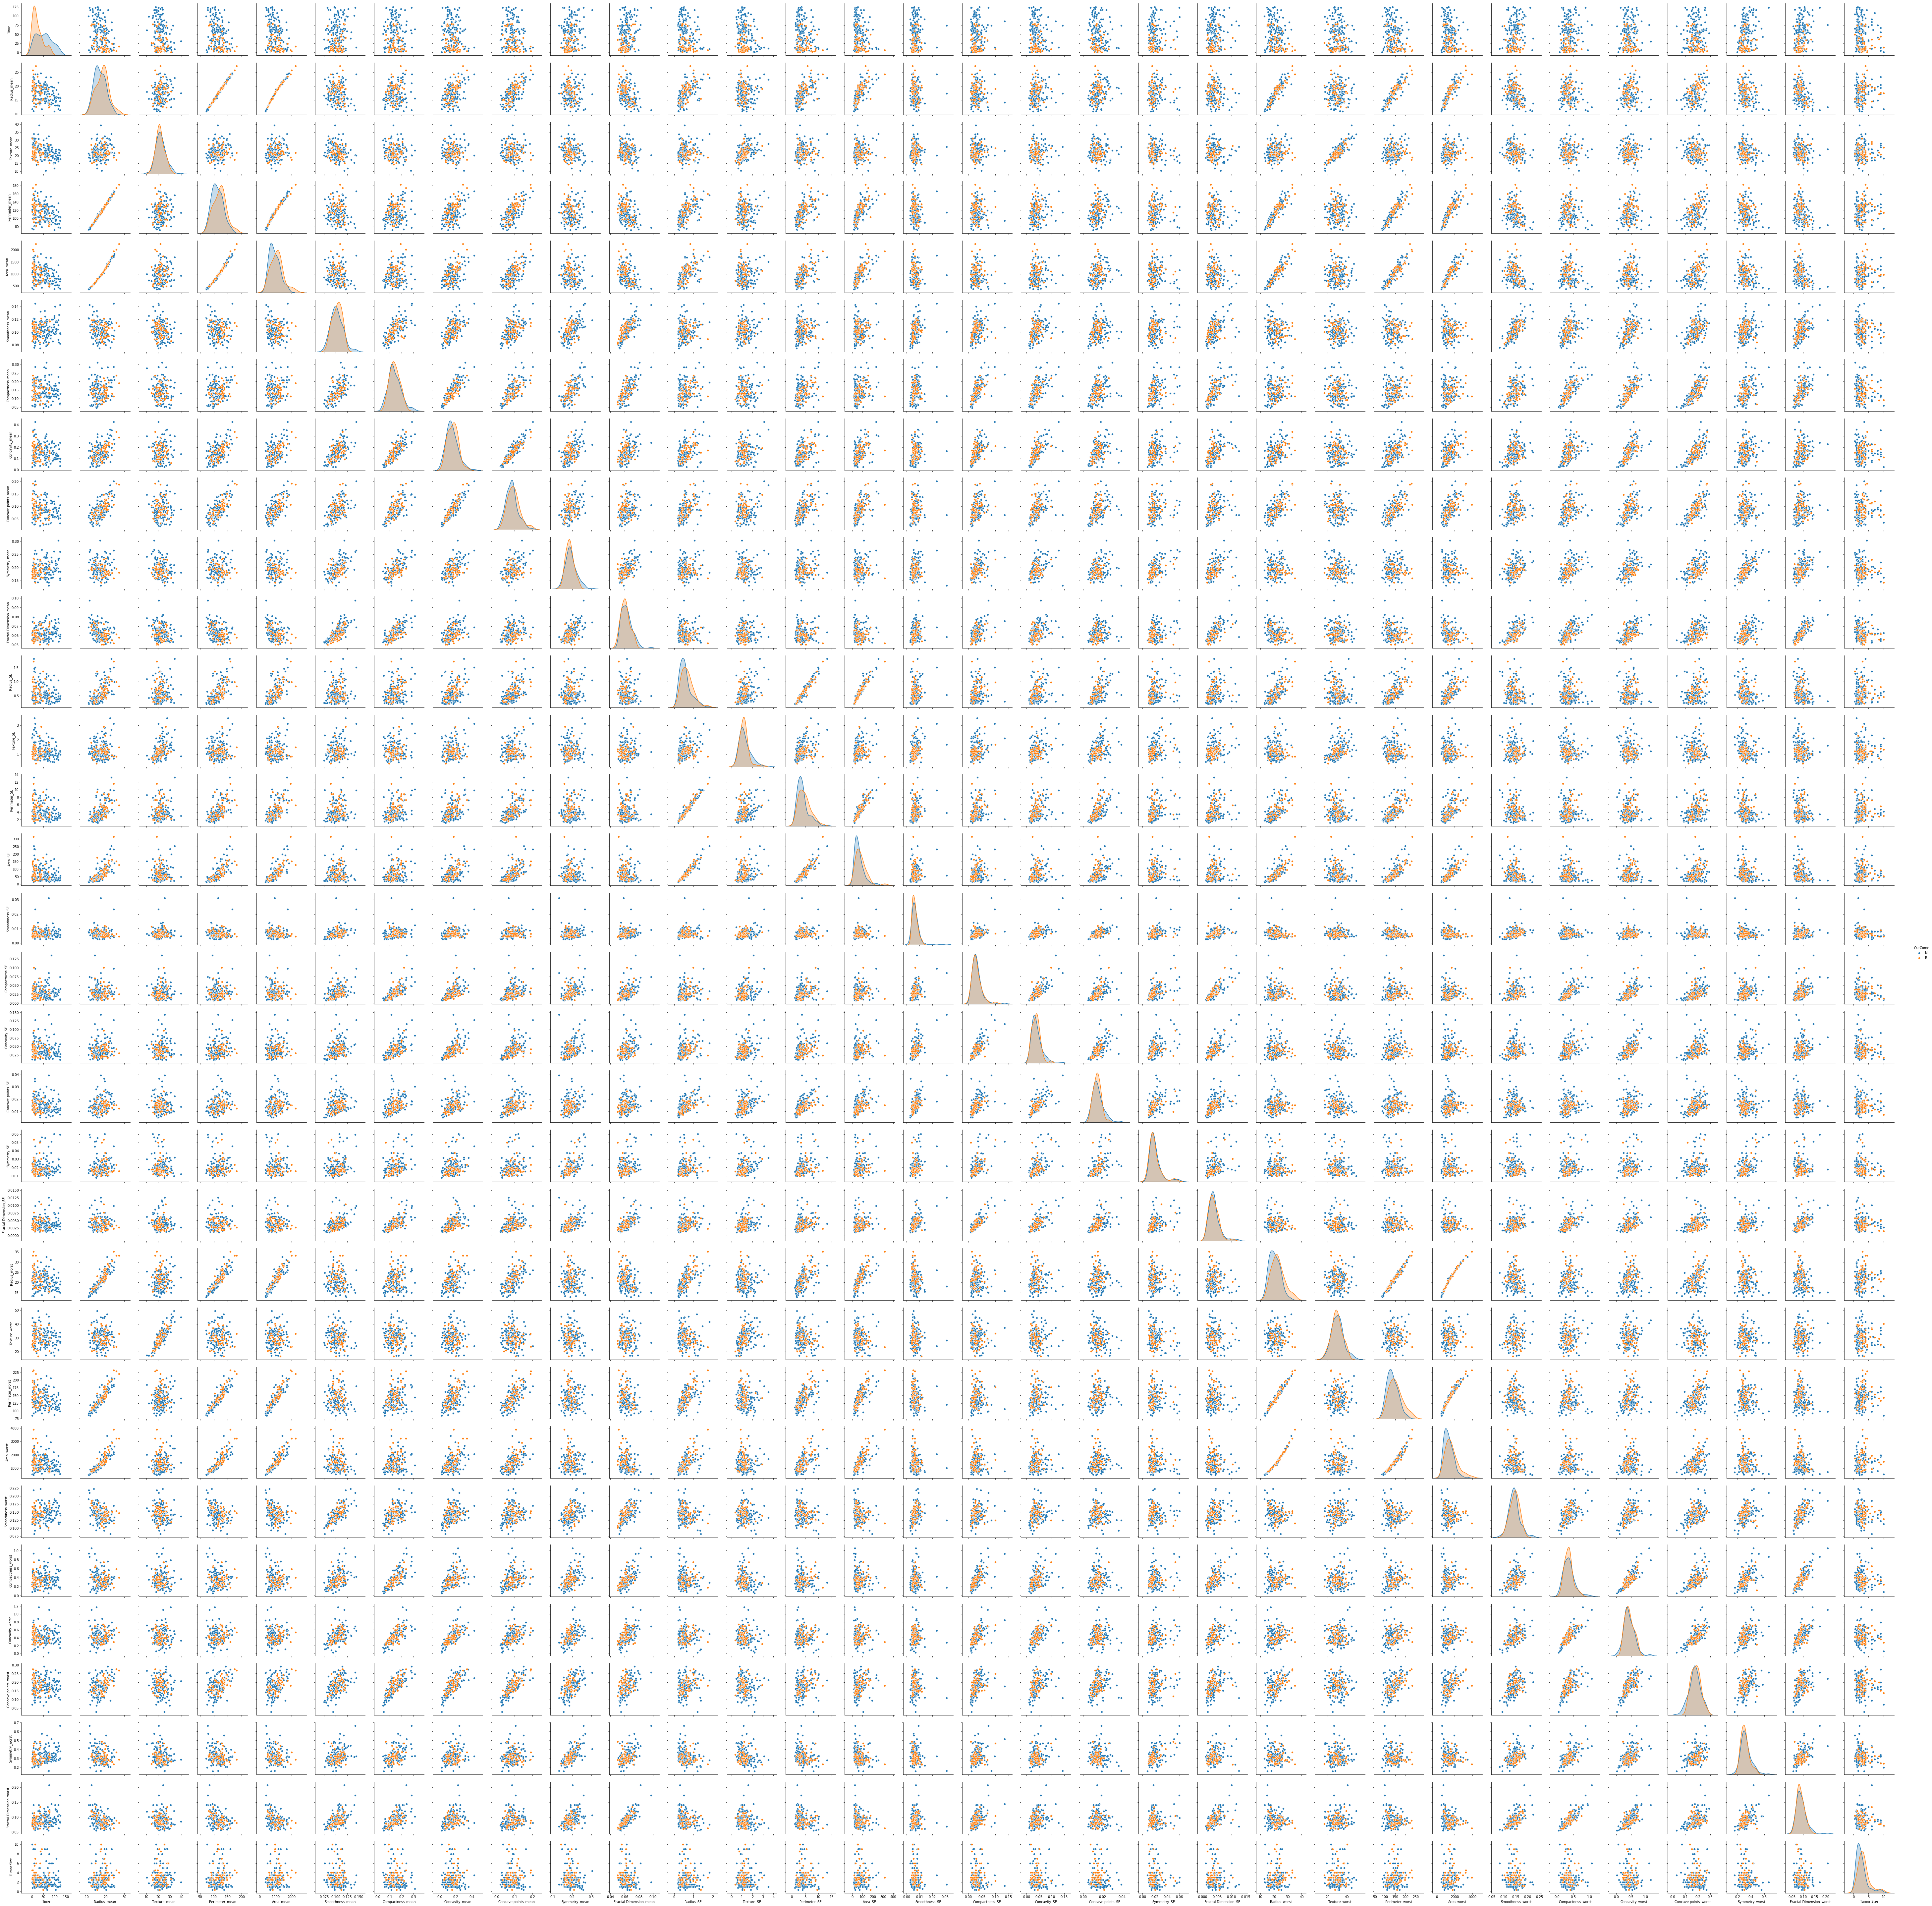

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=data,hue='OutCome')

In [0]:
data = data_v3.drop(['ID'], axis=1)
features = data.iloc[:,:-1] 
label = data.iloc[:,-1]
features.head()

Time  Radius_mean  ...  Tumor Size  LymphNode_size
0    31        18.02  ...         5.0               5
1    61        17.99  ...         3.0               2
2   116        21.37  ...         2.5               0
3   123        11.42  ...         2.0               0
4    27        20.29  ...         3.5               0

[5 rows x 33 columns]

Feature_Selection : Two method of the Filter(chi2) and Extra Trees Classifier were applied. Features ranked high by both the methods were selected. For the method 20 best features were selected.

In [0]:
features = features.replace('?',0)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(features,label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features
chi_support = bestfeatures.get_support()
chi_feature = features.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

                features        Score
24            Area_worst  2666.167018
4              Area_mean   908.125356
0                   Time   617.977786
14               Area_SE   148.869075
23       Perimeter_worst    63.065828
32        LymphNode_size    51.371387
3         Perimeter_mean    24.427875
21          Radius_worst     9.176818
31            Tumor Size     8.165533
13          Perimeter_SE     4.470749
1            Radius_mean     3.428942
2           Texture_mean     0.675414
22         Texture_worst     0.618907
11             Radius_SE     0.551374
12            Texture_SE     0.250812
8    Concave points_mean     0.036415
29        Symmetry_worst     0.019218
7         Concavity_mean     0.018922
28  Concave points_worst     0.012433
17          Concavity_SE     0.007675
15 selected features


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


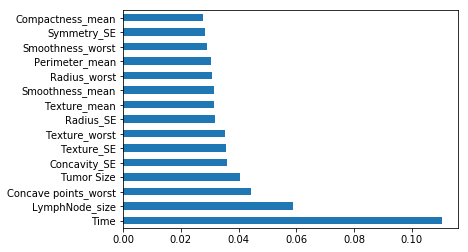

15 selected features


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,label)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()
feat_importances = model.feature_importances_
index = features.columns
df_2scores = pd.DataFrame(feat_importances)
df_2columns = pd.DataFrame(index)
featureScores_etc = pd.concat([df_2columns,df_2scores],axis=1)
featureScores_etc.columns = ['features','Score'] 
et_support = bestfeatures.get_support()
et_feature = features.loc[:,et_support].columns.tolist()
print(str(len(et_feature)), 'selected features')



In [0]:
feature_name = features.columns.tolist()
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'ET':et_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(15)

Feature  Chi-2    ET  Total
1        Tumor Size   True  True      2
2              Time   True  True      2
3     Texture_worst   True  True      2
4      Texture_mean   True  True      2
5        Texture_SE   True  True      2
6      Radius_worst   True  True      2
7       Radius_mean   True  True      2
8         Radius_SE   True  True      2
9   Perimeter_worst   True  True      2
10   Perimeter_mean   True  True      2
11     Perimeter_SE   True  True      2
12   LymphNode_size   True  True      2
13       Area_worst   True  True      2
14        Area_mean   True  True      2
15          Area_SE   True  True      2

A random forest Classifier was applied to the original Features and Label

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [0]:
param_grid = { 
    'n_estimators': [500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
best_estimator= CV_rfc.best_estimator_
best_para = CV_rfc.best_params_

In [0]:
y_pred = best_estimator.predict(x_test)
accuracy_rfc_org = accuracy_score(y_test,y_pred)*100
print("Accuracy for Random Forest on original data_set: ",accuracy_score(y_test,y_pred))
Result1.update(Random_Forest_original=accuracy_rfc_org)
Result1

Accuracy for Random Forest on original data_set:  0.85


{'Random_Forest_original': 85.0, 'SVM_original': []}

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
def svm_fit(X, y):    
    acc = 0
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True) # 70% training and 30% test

        clf = svm.SVC(gamma='scale')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        acc += accuracy_score(y_test, y_pred)
        
        
    print("Accuracy on of SVM:", acc/100)
    return acc

acc = svm_fit(features, label)
print (acc)
_SVM_Original = acc
Result1.update(SVM_original=_SVM_Original)
Result1


Accuracy on of SVM: 0.7535000000000001
75.35000000000001


{'Random_Forest_original': 85.0, 'SVM_original': 75.35000000000001}

Only Keeping the top ranked features in the feature Matrix

In [0]:
selected_feature = features.drop(['Smoothness_mean', 'Smoothness_SE','Smoothness_worst','Compactness_mean','Compactness_SE','Compactness_worst','Concavity_worst','Concave points_SE','Symmetry_mean','Symmetry_SE','Fractal Dimension_mean','Fractal Dimension_SE','Fractal Dimension_worst'],axis = 1)

In [0]:
selected_feature.shape

(198, 20)

# Statistical Analysis  of the Selected features

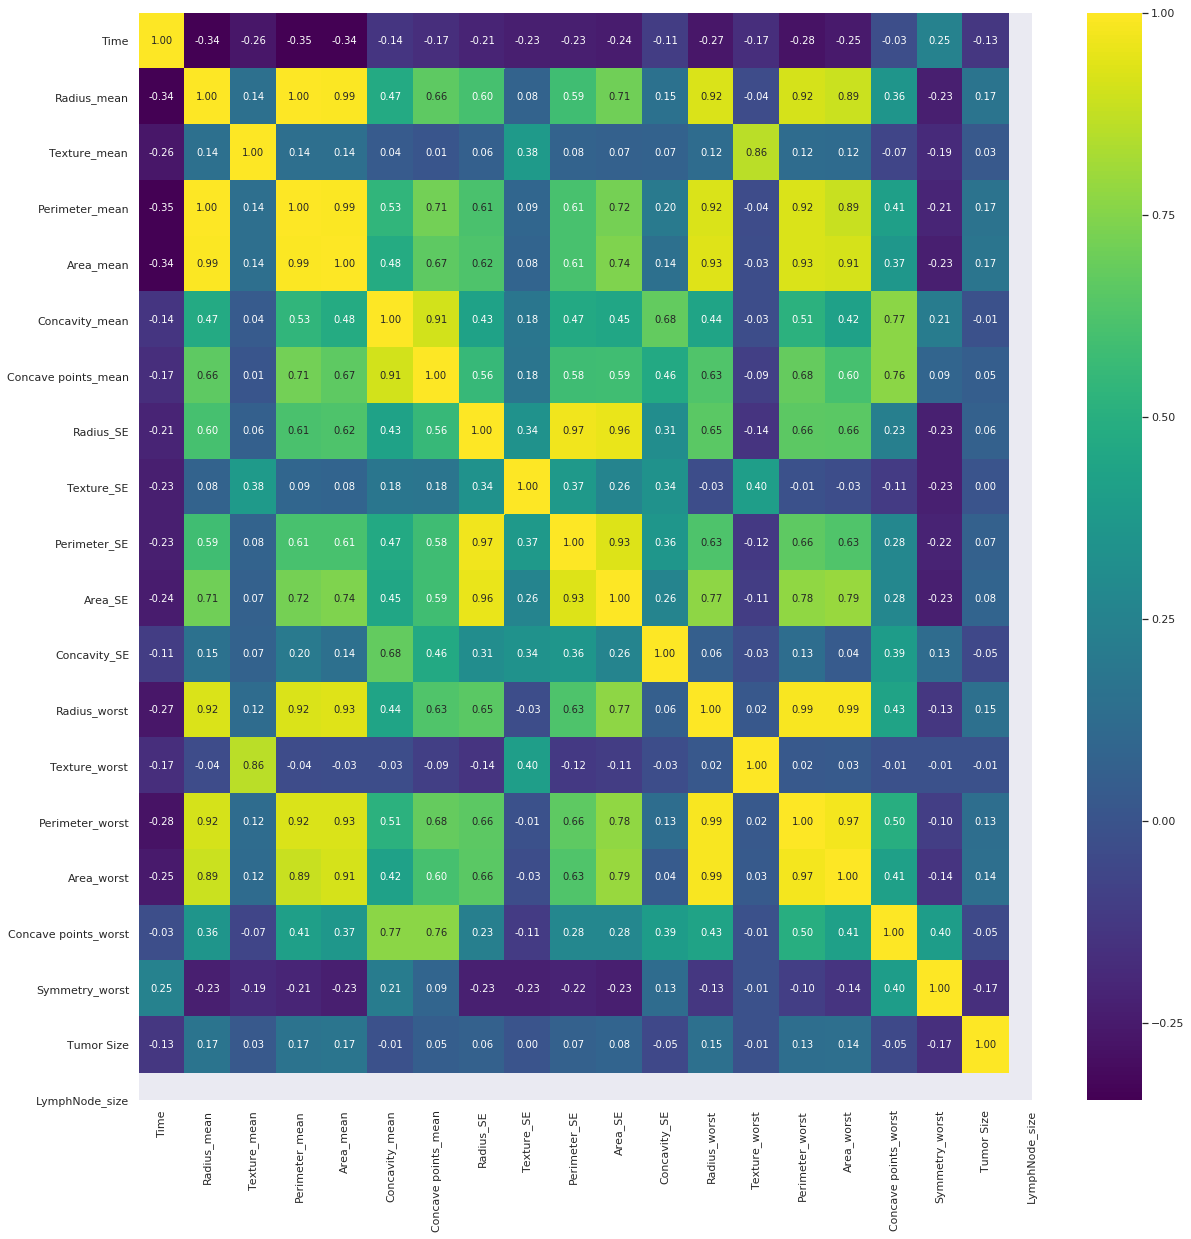

In [0]:
import numpy as np
# Plot a Correlation chart
corr = selected_feature.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(20,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= selected_feature.columns, yticklabels= selected_feature.columns,
           cmap= 'viridis')

Defining the function to scale the selected features

In [0]:
from sklearn import preprocessing
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df
# Scaling the selected feature  
scaled_feature = scaler(selected_feature)

scaled_feature.head()

Time  Radius_mean  ...  Tumor Size  LymphNode_size
0  0.241935     0.434542  ...    0.479167        0.185185
1  0.483871     0.432698  ...    0.270833        0.074074
2  0.927419     0.640443  ...    0.218750        0.000000
3  0.983871     0.028888  ...    0.166667        0.000000
4  0.209677     0.574063  ...    0.322917        0.000000

[5 rows x 20 columns]

In [0]:
accu = svm_fit(scaled_feature, label)
SVM_Orig_ = accu
Result3.update(SVM=SVM_Orig_)
Result3


#x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(selected_feature, label, test_size=0.2, random_state=42)

Accuracy on of SVM: 0.7859999999999995


{'Random_Forest': [], 'SVM': 78.59999999999995}

In [0]:
svm_fit(selected_feature, label)

Accuracy on of SVM: 0.7639999999999999


76.39999999999999

In [0]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_feature, label, test_size=0.1, random_state=42)

In [0]:
rfc_scaled=RandomForestClassifier(random_state=42)
CV_rfc_scaled = GridSearchCV(estimator=rfc_scaled, param_grid=param_grid, cv= 5)
CV_rfc_scaled.fit(x_train_scaled, y_train_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
best_est= CV_rfc_scaled.best_estimator_
best_parameter = CV_rfc_scaled.best_params_
y_pred = best_est.predict(x_test_scaled)
A = accuracy_score(y_test_scaled,y_pred)*100
Result3.update(Random_Forest=A)
Result3
print("Accuracy for Random Forest on original data_set: ",accuracy_score(y_test_scaled,y_pred))
Result3

Accuracy for Random Forest on original data_set:  0.85


{'Random_Forest': 85.0, 'SVM': 78.59999999999995}

In [0]:
Result3

{'Random_Forest': 85.0, 'SVM': 78.59999999999995}

In [0]:
Result1

{'Random_Forest_original': [], 'SVM_original': []}

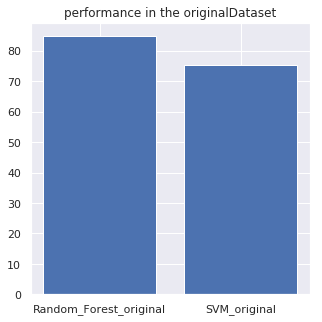

In [0]:
import matplotlib.pyplot as plt
#print(Result3)
#print(Result1)
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
#D = {u'Label1':26, u'Label2': 17, u'Label3':30}


plt.bar(range(len(Result1)), list(Result1.values()), align='center')
plt.xticks(range(len(Result1)), list(Result1.keys()))
plt.title('performance in the originalDataset')
plt.show()



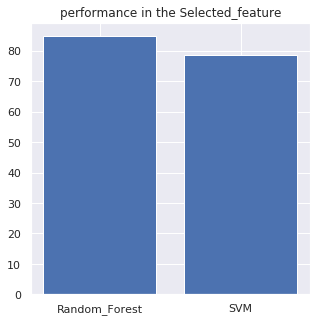

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
plt.bar(range(len(Result3)), list(Result3.values()), align='center')
plt.xticks(range(len(Result3)), list(Result3.keys()))
plt.title('performance in the Selected_feature')
plt.show()